In [13]:
import urllib.request
import json
import pandas as pd
import datetime
import time

In [30]:
# 일별 박스오피스 30일치 가져오기
def cineBoxInfo():
    # 오늘 날짜를 가져와서 사용할 형식으로 만들기
    movieDate = time.strftime('%Y%m%d', time.localtime(time.time()))
    cine = []
    for i in range(0, 30):
        # 자료는 매일 갱신되며 갱신 시간 이전에 요청 시 내용이 비어 있음
        # str -> date
        datetime_obj = datetime.datetime.strptime(movieDate, '%Y%m%d').date()
        datetime_obj_tmp = datetime_obj - datetime.timedelta(days=1)
        # date -> str
        movieDate = datetime_obj_tmp.strftime('%Y%m%d')
        print(movieDate, end=' ')
        
        url = f'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=c1259d1034a8d753877bf1eac2f78cc9&targetDt={movieDate}'
        response = urllib.request.urlopen(url)
        rescode = response.getcode()
        if (rescode == 200):
            responseData = response.read()
            
        result = json.loads(responseData)
        pre_result = result['boxOfficeResult']['dailyBoxOfficeList']
        
        for i in range(0, len(pre_result)):
            pre_result[i]['targetDt'] = movieDate
            cine.append(pre_result[i])
    columns = ['rnum', 'rank', ' rankInten', 'rankOldAndNew', 'movieCd', 'movieNm', 'openDt', 'targetDt', 'salesAmt', 'salesShare',
              'salesInten', 'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange', 'audiAcc', 'scrnCnt', 'showCnt']
    dataframe = pd.DataFrame(cine, columns=columns)
    dataframe.to_csv('cinebox.csv', index=False)
    return dataframe

In [43]:
df = cineBoxInfo()

20191007 20191006 20191005 20191004 20191003 20191002 20191001 20190930 20190929 20190928 20190927 20190926 20190925 20190924 20190923 20190922 20190921 20190920 20190919 20190918 20190917 20190916 20190915 20190914 20190913 20190912 20190911 20190910 20190909 20190908 

In [44]:
df.columns

Index(['rnum', 'rank', ' rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'targetDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt'],
      dtype='object')

In [45]:
df.head()

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
1,2,2,NaN,OLD,20195920,가장 보통의 연애,2019-10-02,20191007,794886970,28.3,-1106355660,-58.2,9921111850,98738,-118239,-54.5,1163222,1012,5012
2,3,3,NaN,OLD,20184483,퍼펙트맨,2019-10-02,20191007,373285070,13.3,-635892060,-63,5907799350,46972,-68864,-59.4,711272,780,3071
3,4,4,NaN,OLD,20193601,장사리 : 잊혀진 영웅들,2019-09-25,20191007,90263400,3.2,-187674420,-67.5,8352025650,12036,-21189,-63.8,1050150,567,1431
4,5,5,NaN,OLD,20194456,양자물리학,2019-09-25,20191007,24664420,0.9,-28527260,-53.6,4461218540,3132,-3050,-49.3,545785,362,607


In [47]:
df = pd.read_csv(r'cinebox.csv', engine='python', encoding='utf-8')
# df = df.drop('Unnamed:0', axis=1) 불러온 컬럼 중 제거할 컬럼이 있다면 제거
print(df.columns)
df.head()

Index(['rnum', 'rank', ' rankInten', 'rankOldAndNew', 'movieCd', 'movieNm',
       'openDt', 'targetDt', 'salesAmt', 'salesShare', 'salesInten',
       'salesChange', 'salesAcc', 'audiCnt', 'audiInten', 'audiChange',
       'audiAcc', 'scrnCnt', 'showCnt'],
      dtype='object')


,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
1,2,2,NaN,OLD,20195920,가장 보통의 연애,2019-10-02,20191007,794886970,28.3,-1106355660,-58.2,9921111850,98738,-118239,-54.5,1163222,1012,5012
2,3,3,NaN,OLD,20184483,퍼펙트맨,2019-10-02,20191007,373285070,13.3,-635892060,-63.0,5907799350,46972,-68864,-59.4,711272,780,3071
3,4,4,NaN,OLD,20193601,장사리 : 잊혀진 영웅들,2019-09-25,20191007,90263400,3.2,-187674420,-67.5,8352025650,12036,-21189,-63.8,1050150,567,1431
4,5,5,NaN,OLD,20194456,양자물리학,2019-09-25,20191007,24664420,0.9,-28527260,-53.6,4461218540,3132,-3050,-49.3,545785,362,607


In [51]:
df['movieNm']

0                        조커
1                 가장 보통의 연애
2                      퍼펙트맨
3             장사리 : 잊혀진 영웅들
4                     양자물리학
5              나쁜 녀석들: 더 무비
6      원스 어폰 어 타임... 인 할리우드
7                     제미니 맨
8          소피와 드래곤: 마법책의 비밀
9                   몬스터 하우스
10                       조커
11                가장 보통의 연애
12                     퍼펙트맨
13            장사리 : 잊혀진 영웅들
14         소피와 드래곤: 마법책의 비밀
15                  몬스터 하우스
16                    양자물리학
17             나쁜 녀석들: 더 무비
18     원스 어폰 어 타임... 인 할리우드
19                   47미터 2
20                       조커
21                가장 보통의 연애
22                     퍼펙트맨
23            장사리 : 잊혀진 영웅들
24         소피와 드래곤: 마법책의 비밀
25                    양자물리학
26                  몬스터 하우스
27             나쁜 녀석들: 더 무비
28     원스 어폰 어 타임... 인 할리우드
29                   47미터 2
               ...         
270            그것: 두 번째 이야기
271                유열의 음악앨범
272                     엑시트
273                      변신
274            분노의 질

In [58]:
# df['movieNm']=='조커' -> 실행하면 movieNm이 조커이면 True, 아니면 False
df[df['movieNm']=='조커']   # 값이 True인것만 가져옴

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500
10,1,1,NaN,OLD,20199950,조커,2019-10-02,20191006,3696438010,50.7,-906711140,-19.7,19353015910,414850,-99473,-19.3,2199835,1410,7097
20,1,1,NaN,OLD,20199950,조커,2019-10-02,20191005,4603149150,53.2,1450662200,46.0,15656577900,514323,157689,44.2,1784985,1418,7214
30,1,1,NaN,OLD,20199950,조커,2019-10-02,20191004,3152486950,52.8,-2040049960,-39.3,11053428750,356634,-231183,-39.3,1270662,1327,6513
40,1,1,NaN,OLD,20199950,조커,2019-10-02,20191003,5192536910,48.6,2512047220,93.7,7900941800,587817,264408,81.8,914028,1356,6422
50,1,1,NaN,OLD,20199950,조커,2019-10-02,20191002,2680489690,52.7,2653414490,9800.2,2708404890,323409,320687,11781.3,326211,1192,5576


In [60]:
title = '조커'
temp = df[df['movieNm'] == title]
temp.sort_values(by=['targetDt'], ascending=True, inplace=True)   # by=['targetDt'] : 요청한 날짜를 기준으로 정렬
temp

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,targetDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
50,1,1,NaN,OLD,20199950,조커,2019-10-02,20191002,2680489690,52.7,2653414490,9800.2,2708404890,323409,320687,11781.3,326211,1192,5576
40,1,1,NaN,OLD,20199950,조커,2019-10-02,20191003,5192536910,48.6,2512047220,93.7,7900941800,587817,264408,81.8,914028,1356,6422
30,1,1,NaN,OLD,20199950,조커,2019-10-02,20191004,3152486950,52.8,-2040049960,-39.3,11053428750,356634,-231183,-39.3,1270662,1327,6513
20,1,1,NaN,OLD,20199950,조커,2019-10-02,20191005,4603149150,53.2,1450662200,46.0,15656577900,514323,157689,44.2,1784985,1418,7214
10,1,1,NaN,OLD,20199950,조커,2019-10-02,20191006,3696438010,50.7,-906711140,-19.7,19353015910,414850,-99473,-19.3,2199835,1410,7097
0,1,1,NaN,OLD,20199950,조커,2019-10-02,20191007,1386982140,49.4,-2309455870,-62.5,20739998050,167699,-247151,-59.6,2367534,1293,6500


In [62]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings('ignore')

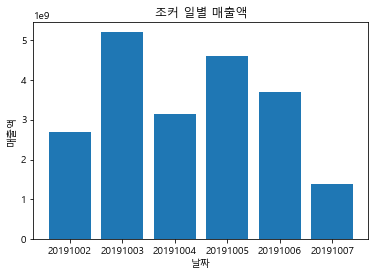

In [74]:
# 일별 매출액을 막대 그래프로 나타내기
mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
# plt.bar(temp['targetDt'], temp['salesAmt'])
plt.bar(temp['targetDt'].astype(str), temp['salesAmt'])
plt.title('조커 일별 매출액')
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=10)
url1='' + title + ' 일별 매출액 막대 그래프' + '.png'
plt.savefig(url1)

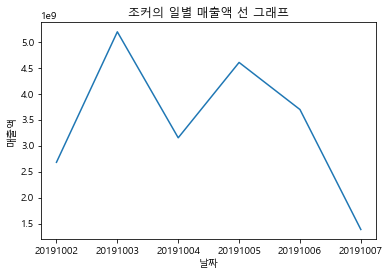

In [73]:
mpl.rc('font', family='Malgun Gothic')
plt.plot(temp['targetDt'].astype(str), temp['salesAmt'], y)
plt.title('{}의 일별 매출액 선 그래프'.format(temp.iloc[0,5]))
plt.xlabel('날짜')
plt.ylabel('매출액')
plt.xticks(fontsize=10)
plt.show()